In [28]:
import pandas as pd
import seaborn as sns
import sys

# Append the directory, not the file
sys.path.append('/Volumes/Maestria/GitHub/NEO/NEO/API_test/')

import dataprocess as dp


In [29]:
df = pd.read_csv('/Volumes/Maestria/GitHub/NEO/NEO/API_test/neo_data_copy.csv') 
df.head()

,links,id,neo_reference_id,name,name_limited,designation,nasa_jpl_url,absolute_magnitude_h,estimated_diameter,is_potentially_hazardous_asteroid,close_approach_data,orbital_data,is_sentry_object
0,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,2000433.0,2000433.0,433 Eros (A898 PA),Eros,433,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,10.41,{'kilometers': {'estimated_diameter_min': 22.0...,False,"[{'close_approach_date': '1900-12-27', 'close_...","{'orbit_id': '659', 'orbit_determination_date'...",False
1,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,2000719.0,2000719.0,719 Albert (A911 TB),Albert,719,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,15.59,{'kilometers': {'estimated_diameter_min': 2.02...,False,"[{'close_approach_date': '1909-08-21', 'close_...","{'orbit_id': '266', 'orbit_determination_date'...",False
2,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,2000887.0,2000887.0,887 Alinda (A918 AA),Alinda,887,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,13.88,{'kilometers': {'estimated_diameter_min': 4.45...,False,"[{'close_approach_date': '1910-01-04', 'close_...","{'orbit_id': '488', 'orbit_determination_date'...",False
3,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,2001036.0,2001036.0,1036 Ganymed (A924 UB),Ganymed,1036,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,9.25,{'kilometers': {'estimated_diameter_min': 37.5...,False,"[{'close_approach_date': '1910-02-25', 'close_...","{'orbit_id': '1240', 'orbit_determination_date...",False
4,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,2001221.0,2001221.0,1221 Amor (1932 EA1),Amor,1221,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,17.38,{'kilometers': {'estimated_diameter_min': 0.88...,False,"[{'close_approach_date': '1900-03-08', 'close_...","{'orbit_id': '121', 'orbit_determination_date'...",False


In [30]:
df = dp.OverallProcessor(df).clean()
df.head()

,absolute_magnitude_h,is_hazardous,relative_velocity.kilometers_per_hour,miss_distance.kilometers,estimated_diameter_min,estimated_diameter_max,minimum_orbit_intersection,eccentricity,inclination,perihilion_distance,aphelion_distance,estimated_diameter_average
0,10.41,0,20083.0290749201,47112732.928149391,22.0067027115,49.2084832235,.15023,.2226906033843441,10.8277255953075,1.133458052992745,1.782904615277399,35.607593
1,10.41,0,15820.1671985367,70533232.893794475,22.0067027115,49.2084832235,.15023,.2226906033843441,10.8277255953075,1.133458052992745,1.782904615277399,35.607593
2,10.41,0,17340.4224662258,74687814.59975122,22.0067027115,49.2084832235,.15023,.2226906033843441,10.8277255953075,1.133458052992745,1.782904615277399,35.607593
3,10.41,0,16545.797587763,53823292.394218643,22.0067027115,49.2084832235,.15023,.2226906033843441,10.8277255953075,1.133458052992745,1.782904615277399,35.607593
4,10.41,0,21314.9467227704,26040971.835879446,22.0067027115,49.2084832235,.15023,.2226906033843441,10.8277255953075,1.133458052992745,1.782904615277399,35.607593


In [6]:
df = dp.OverallProcessor(df).smote()
df.shape

(275832, 12)

<Axes: >

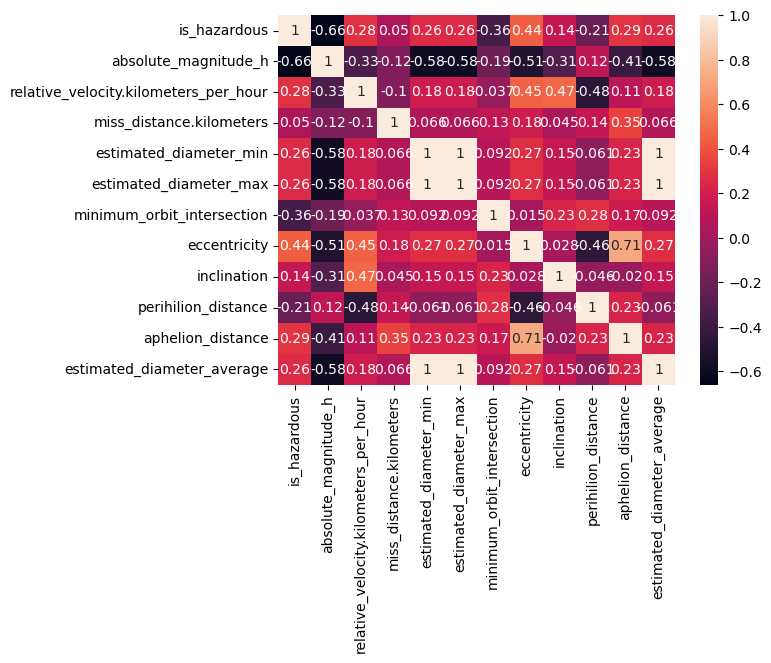

In [7]:
sns.heatmap(df.corr(), annot=True)

In [8]:
corr_matrix = df.corr()

corr_matrix['is_hazardous'].sort_values(ascending=False)

is_hazardous                             1.000000
eccentricity                             0.436977
aphelion_distance                        0.287398
relative_velocity.kilometers_per_hour    0.282763
estimated_diameter_min                   0.256094
estimated_diameter_average               0.256094
estimated_diameter_max                   0.256094
inclination                              0.144366
miss_distance.kilometers                 0.049771
perihilion_distance                     -0.206706
minimum_orbit_intersection              -0.357711
absolute_magnitude_h                    -0.660433
Name: is_hazardous, dtype: float64

In [9]:
scsplit = dp.scalesplit(df)
X_train, X_test, y_train, y_test = scsplit.ssplit()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((220665, 11), (55167, 11), (220665,), (55167,))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. 

Best parameters: {'C': 0.1, 'fit_intercept': True, 'n_jobs': 8, 'penalty': 'l2', 'random_state': 0, 'solver': 'liblinear', 'warm_start': True}
Best Score: 0.9834636213264452
Best Estimator: LogisticRegression(C=0.1, n_jobs=8, random_state=0, solver='liblinear',
                   warm_start=True) 


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


The accuracy score is 0.9538854750122355, The recall score is 0.9155574733627643, The f1 score is 0.9559175186276209
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.91      0.95     27584
           1       0.92      1.00      0.96     27583

    accuracy                           0.95     55167
   macro avg       0.96      0.95      0.95     55167
weighted avg       0.96      0.95      0.95     55167



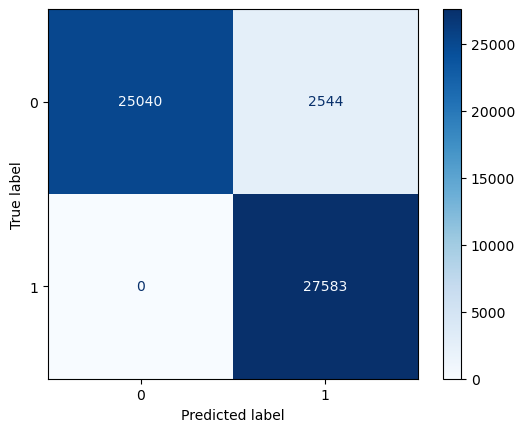

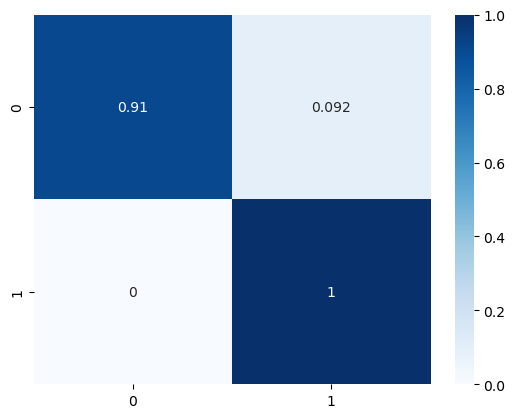

In [12]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.Regression()